Import Library

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Pengumpulan Data

In [ ]:
df = pd.read_csv('barang_keluar.csv', delimiter=';', skiprows=0, low_memory=False)

df.head()

kode_barang  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)   
1      2 TANG  MELATI 1 RENCENG (ISI 10)   
2                     AQUA 1500 ML 1 DUS   
3                           RIBUT KILOAN   
4                             7916248823   

                             nama_barang  jumlah_transaksi  total_penjualan  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)                 1                1   
1      2 TANG  MELATI 1 RENCENG (ISI 10)                 1                1   
2                     AQUA 1500 ML 1 DUS                10               11   
3                           RIBUT KILOAN                77               83   
4                        MINYAK TAWON FF                 8                9   

   rata_rata  
0     1.0000  
1     1.0000  
2     1.1000  
3     1.0779  
4     1.1250

Pra Proses Data (Selection)

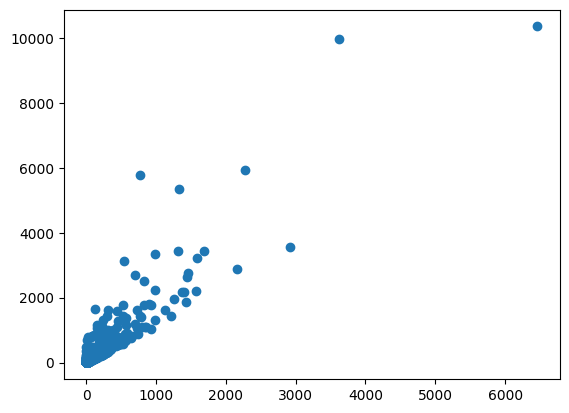

In [ ]:
plt.scatter(df['jumlah_transaksi'],df['total_penjualan'])

Pra Proses Data (Cleansing)

In [ ]:
print("Missing values:\n", df.isnull().sum())  # Cek nilai kosong
df = df.dropna()  # Hapus baris yang memiliki nilai NaN

Missing values:
 kode_barang          0
nama_barang         30
jumlah_transaksi     0
total_penjualan      0
rata_rata            0
dtype: int64


Pra Proses Data (Transform)

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['jumlah_transaksi','total_penjualan']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

kode_barang  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)   
1      2 TANG  MELATI 1 RENCENG (ISI 10)   
2                     AQUA 1500 ML 1 DUS   
3                           RIBUT KILOAN   
4                             7916248823   

                             nama_barang  jumlah_transaksi  total_penjualan  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)                 1                1   
1      2 TANG  MELATI 1 RENCENG (ISI 10)                 1                1   
2                     AQUA 1500 ML 1 DUS                10               11   
3                           RIBUT KILOAN                77               83   
4                        MINYAK TAWON FF                 8                9   

   rata_rata  cluster  
0     1.0000        0  
1     1.0000        0  
2     1.1000        0  
3     1.0779        0  
4     1.1250        0

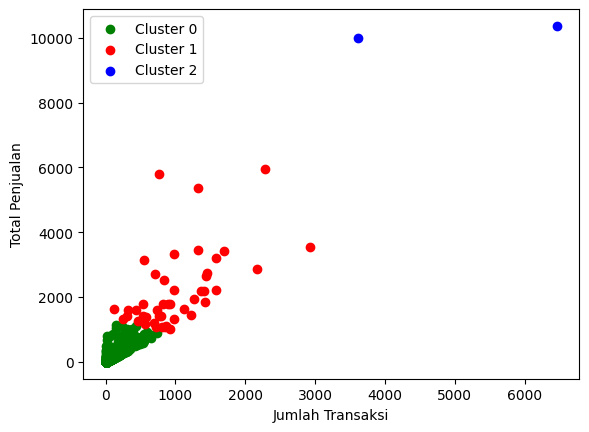

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# df4 = df[df.cluster==3]

plt.scatter(df1.jumlah_transaksi,df1['total_penjualan'],color='green', label='Cluster 0')
plt.scatter(df2.jumlah_transaksi,df2['total_penjualan'],color='red', label='Cluster 1')
plt.scatter(df3.jumlah_transaksi,df3['total_penjualan'],color='blue', label='Cluster 2')
# plt.scatter(df4.jumlah_transaksi,df4['total_penjualan'],df4['rata_rata'],color='gray')

plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Penjualan')
plt.legend()

In [ ]:
# Inisialisasi objek MinMaxScaler untuk Transform Data - Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()

# Menormalisasi kolom 'total_penjualan' dan 'jumlah_transaksi' untuk mengurangi skewness
scaler.fit(df[['total_penjualan']])

df['total_penjualan_cluster']= scaler.transform(df[['total_penjualan']])

scaler.fit(df[['jumlah_transaksi']])

df['jumlah_transaksi_cluster'] = scaler.transform(df[['jumlah_transaksi']])

# scaler.fit(df['rata_rata'])
# df['rata_rata'] = scaler.transform(df['rata_rata'])
# df

Modelling - Algoritma K-means clustering

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['jumlah_transaksi','total_penjualan']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[  27.15782219,   36.54348725],
       [2282.72727273, 5208.63636364],
       [ 520.23364486, 1059.37383178]])

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

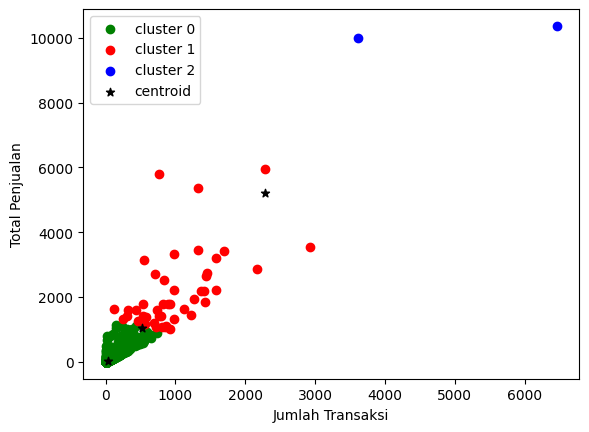

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# df4 = df[df.cluster==3]

plt.scatter(df1.jumlah_transaksi,df1['total_penjualan'],color='green',label='cluster 0')
plt.scatter(df2.jumlah_transaksi,df2['total_penjualan'],color='red',label='cluster 1')
plt.scatter(df3.jumlah_transaksi,df3['total_penjualan'],color='blue',label='cluster 2')
# plt.scatter(df4.jumlah_transaksi,df4['total_penjualan'],df4['rata_rata'],color='gray')

# split data
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid' )

plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Penjualan')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['jumlah_transaksi','total_penjualan']])
    sse.append(km.inertia_)

In [ ]:
sse

[674081312.6559064,
 301408780.19994146,
 170027441.90753388,
 96706432.20745133,
 69572958.90333231,
 47083352.58945728,
 34889979.283468746,
 29870070.880595252,
 24817507.346478857]

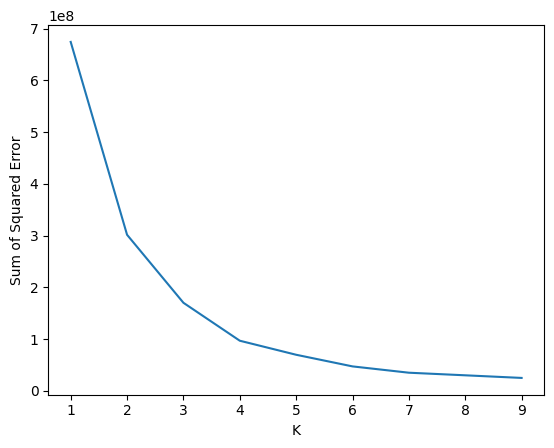

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

Evaluasi Data

In [ ]:
selected_cols = ["jumlah_transaksi","total_penjualan"]
cluster_data = df.loc[:,selected_cols]

kmeans_sel = KMeans(init='k-means++', n_clusters=3, n_init=100, random_state=2).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

jumlah_transaksi  total_penjualan
Cluster                                   
0.0                  37.2             57.6
1.0                 113.6            273.9
2.0                  16.0             18.6

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['cluster'],km.labels_))

[[6169    0    0   71  214    0  872    0    0]
 [   0   14    0    0    0   28    0    3    0]
 [   0    0    1    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]]


In [ ]:
print(classification_report(df['cluster'],km.labels_))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      7326
           1       1.00      0.31      0.47        45
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.84      7373
   macro avg       0.33      0.18      0.23      7373
weighted avg       1.00      0.84      0.91      7373



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df.sort_values(by=['cluster'])

kode_barang  \
0     2 TANG  BLACK TEA 1 RENCENG  (ISI 10)   
4926                          8998866182188   
4925                          8998866182171   
4924                          8998866181082   
4923                          8998866181075   
...                                     ...   
5471                          8998989110167   
2179                          8992780010091   
6554                      GULA PASIR 1/4 KG   
6477                                DINGIN    
6553                      GULA PASIR 1/2 KG   

                                nama_barang  jumlah_transaksi  \
0     2 TANG  BLACK TEA 1 RENCENG  (ISI 10)                 1   
4926            MAMA LEMON FRES LEMON 750ML                 3   
4925                 MAMA LEMON 400ML BOTOL                17   
4924              CIPTADENT FRESH MINT 190G                48   
4923              CIPTADENT FRESH MINT 120G                80   
...                                     ...               ...   
5471                            GG SURYA 16              2165   
2179                     2TANG SUPER 1 PACK               769   
6554                      GULA PASIR 1/4 KG               983   
6477                                 DINGIN              6457   
6553                      GULA PASIR 1/2 KG              3619   

      total_penjualan  rata_rata  cluster  total_penjualan_cluster  \
0                   1     1.0000        0                 0.000000   
4926                3     1.0000        0                 0.000193   
4925               17     1.0000        0                 0.001544   
4924               53     1.1042        0                 0.005018   
4923               91     1.1375        0                 0.008686   
...               ...        ...      ...                      ...   
5471             2873     1.3270        1                 0.277167   
2179             1422     1.8492        1                 0.137136   
6554             3335     3.3927        1                 0.321753   
6477            10363     1.6049        2                 1.000000   
6553             9992     2.7610        2                 0.964196   

      jumlah_transaksi_cluster  
0                     0.000000  
4926                  0.000310  
4925                  0.002478  
4924                  0.007280  
4923                  0.012237  
...                        ...  
5471                  0.335192  
2179                  0.118959  
6554                  0.152107  
6477                  1.000000  
6553                  0.560409  

[7373 rows x 8 columns]

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.sort_values(by=['cluster'])

kode_barang  \
0                 2 TANG  BLACK TEA 1 RENCENG  (ISI 10)   
4926                                      8998866182188   
4925                                      8998866182171   
4924                                      8998866181082   
4923                                      8998866181075   
4922                                      8998866181068   
4921                                      8998866108799   
4920                                      8998866108324   
4919                                      8998866108317   
4918                                      8998866108300   
4917                                      8998866108287   
4916                                      8998866108270   
4927                                      8998866182201   
4915                                      8998866108263   
4913                                      8998866108225   
4912                                      8998866108126   
4911                                      8998866108119   
4910                                      8998866108102   
4909                                      8998866108010   
4908                                      8998866108003   
4907                                      8998866107990   
4906                                      8998866107952   
4905                                      8998866107945   
4904                                      8998866107938   
4903                                      8998866107914   
4914                                      8998866108232   
4928                                      8998866182218   
4929                                      8998866183178   
4930                                      8998866183185   
4959                                      8998866200820   
4958                                      8998866200813   
4957                                      8998866200790   
4956                                      8998866200745   
4955                                      8998866200691   
4954                                      8998866200660   
4953                                      8998866200646   
4952                                      8998866200592   
4951                                      8998866200578   
4950                                      8998866200561   
4948                                      8998866200547   
4947                                      8998866200530   
4946                                      8998866200523   
4945                                      8998866200509   
4944                                      8998866200448   
4943                                      8998866200332   
4939                                      8998866200219   
4938                                      8998866200158   
4937                                      8998866200134   
4936                                      8998866200127   
4935                                      8998866200110   
4934                                      8998866200103   
4933                                      8998866200097   
4932                                      8998866183215   
4931                                      8998866183208   
4902                                      8998866107891   
4960                                      8998866200837   
4901                                      8998866107846   
4899                                      8998866107785   
4869                                      8998866107129   
4868                                      8998866107112   
4867                                      8998866107105   
4866                                      8998866107099   
4865                                      8998866107068   
4864                                      8998866107020   
4863                                      8998866106979   
4862                                      8998866106962   
4861                                      8998866106955   
4860                            

Visualisasi

In [ ]:
df.head()

kode_barang  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)   
1      2 TANG  MELATI 1 RENCENG (ISI 10)   
2                     AQUA 1500 ML 1 DUS   
3                           RIBUT KILOAN   
4                             7916248823   

                             nama_barang  jumlah_transaksi  total_penjualan  \
0  2 TANG  BLACK TEA 1 RENCENG  (ISI 10)                 1                1   
1      2 TANG  MELATI 1 RENCENG (ISI 10)                 1                1   
2                     AQUA 1500 ML 1 DUS                10               11   
3                           RIBUT KILOAN                77               83   
4                        MINYAK TAWON FF                 8                9   

   rata_rata  cluster  total_penjualan_cluster  jumlah_transaksi_cluster  
0     1.0000        0                 0.000000                  0.000000  
1     1.0000        0                 0.000000                  0.000000  
2     1.1000        0                 0.000965                  0.001394  
3     1.0779        0                 0.007914                  0.011772  
4     1.1250        0                 0.000772                  0.001084